## part 1: Build a regression tree where the aim is to predict variable G1.

In [88]:
# read data folder

import os
os.listdir('C:/Users/User/Desktop/STQD6024 MLL/ML assignment 3_regression tree/student')

['student-mat.csv', 'student-merge.R', 'student-por.csv', 'student.txt']

In [89]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/User/STQD6024/Graphviz/bin'

In [90]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

In [91]:
df_mat = pd.read_csv('C:/Users/User/Desktop/STQD6024 MLL/ML assignment 3_regression tree/student/student-mat.csv', sep=';')
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [92]:
df_mat['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [93]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [94]:
df_mat.dtypes
#df_mat['G1'].fillna(data['G1'].mean(), inplace=True)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [95]:
#converting all string into binary or nominal value

df_mat['school'] = df_mat.school.map({'GP':0, 'MS':1})
df_mat['sex'] = df_mat.sex.map({'F':0, 'M':1})
df_mat['address'] = df_mat.address.map({'U':0, 'R':1})
df_mat['famsize'] = df_mat.famsize.map({'LE3':0, 'GT3':1})
df_mat['Pstatus'] = df_mat.Pstatus.map({'T':0, 'A':1})
df_mat.Mjob = pd.factorize(df_mat.Mjob)[0]   # assigning numeric value to each categorical value in the column 
df_mat.Fjob = pd.factorize(df_mat.Fjob)[0]  # assigning numeric value to each categorical value in the column 
df_mat.reason = pd.factorize(df_mat.reason)[0]
df_mat.guardian = pd.factorize(df_mat.guardian)[0]
df_mat['schoolsup'] = df_mat.schoolsup.map({'no':1, 'yes':0})
df_mat['famsup'] = df_mat.famsup.map({'no':1, 'yes':0})
df_mat['paid'] = df_mat.paid.map({'no':1, 'yes':0})
df_mat['activities'] = df_mat.activities.map({'no':1, 'yes':0})
df_mat['nursery'] = df_mat.nursery.map({'no':1, 'yes':0})
df_mat['higher'] = df_mat.higher.map({'no':1, 'yes':0})
df_mat['internet'] = df_mat.internet.map({'no':1, 'yes':0})
df_mat['romantic'] = df_mat.romantic.map({'no':1, 'yes':0})


df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


In [96]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [97]:
df_mat['school'].fillna(df_mat['school'].mode()[0], inplace=True)
df_mat['sex'].fillna(df_mat['sex'].mode(), inplace=True)
df_mat['address'].fillna(df_mat['address'].mode(), inplace=True)
df_mat['famsize'].fillna(df_mat['famsize'].mode(), inplace=True)
df_mat['Pstatus'].fillna(df_mat['Pstatus'].mode(), inplace=True)



In [98]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [99]:
df_mat['romantic'].describe()

count    395.000000
mean       0.665823
std        0.472300
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64

In [100]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


In [101]:
df_mat.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [102]:
#column_to_drop = ['G1', 'G2', 'G3']
X = df_mat.drop(['G1', 'G2', 'G3'], axis = 1)
y = pd.DataFrame(df_mat['G1'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)


In [103]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,1,1,4,4,0,0,...,0,1,1,4,3,4,1,1,3,6
1,0,0,17,0,1,0,1,1,0,1,...,0,0,1,5,3,3,1,1,3,4
2,0,0,15,0,0,0,1,1,0,1,...,0,0,1,4,3,2,2,3,3,10
3,0,0,15,0,1,0,4,2,1,2,...,0,0,0,3,2,2,1,1,5,2
4,0,0,16,0,1,0,3,3,2,1,...,0,1,1,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,3,2,...,0,1,1,5,5,4,4,5,4,11
391,1,1,17,0,0,0,3,1,3,2,...,0,0,1,2,4,5,3,4,2,3
392,1,1,21,1,1,0,1,1,2,1,...,0,1,1,5,5,3,3,3,3,3
393,1,1,18,1,0,0,3,2,3,1,...,0,0,1,4,4,1,3,4,5,0


In [113]:
y['G1'].unique()

array([ 5,  7, 15,  6, 12, 16, 14, 10, 13,  8, 11,  9, 17, 19, 18,  4,  3],
      dtype=int64)

In [105]:
# Pruning not supported. Choosing max depth 2)
regr_tree_mat = DecisionTreeRegressor(max_depth = 2)


In [106]:
regr_tree_mat.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [107]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,1,1,4,4,0,0,...,0,1,1,4,3,4,1,1,3,6
1,0,0,17,0,1,0,1,1,0,1,...,0,0,1,5,3,3,1,1,3,4
2,0,0,15,0,0,0,1,1,0,1,...,0,0,1,4,3,2,2,3,3,10
3,0,0,15,0,1,0,4,2,1,2,...,0,0,0,3,2,2,1,1,5,2
4,0,0,16,0,1,0,3,3,2,1,...,0,1,1,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,3,2,...,0,1,1,5,5,4,4,5,4,11
391,1,1,17,0,0,0,3,1,3,2,...,0,0,1,2,4,5,3,4,2,3
392,1,1,21,1,1,0,1,1,2,1,...,0,1,1,5,5,3,3,3,3,3
393,1,1,18,1,0,0,3,2,3,1,...,0,0,1,4,4,1,3,4,5,0


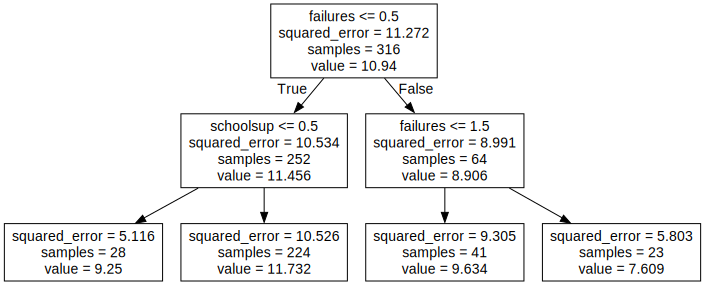

In [108]:
export_graphviz(regr_tree_mat, 
                out_file = "mat_tree.dot", 
                feature_names = X_train.columns)

with open("mat_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

7.338965243637666

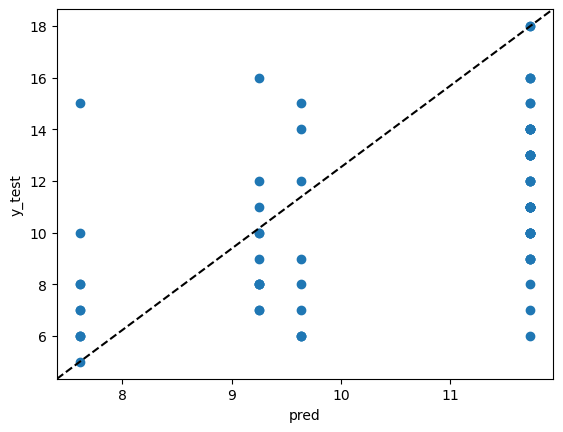

In [109]:
pred = regr_tree_mat.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'G1')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test set MSE associated with the regression tree is 35.4. The square root of the MSE is therefore around 5.95, indicating that this model leads to test predictions that are within around $5,950 of the true median home value for the suburb. (week 8)

The test set MSE associated with the regression tree is 7.34. The square root of the MSE is therefore around 2.71 , indicating that this model leads to test predictions that are within around 2.71, approximately 3 of the true median for G1 grade.

In [115]:
importance_scores = pd.Series(regr_tree_mat.feature_importances_, index=X.columns)
importance_scores

school        0.000000
sex           0.000000
age           0.000000
address       0.000000
famsize       0.000000
Pstatus       0.000000
Medu          0.000000
Fedu          0.000000
Mjob          0.000000
Fjob          0.000000
reason        0.000000
guardian      0.000000
traveltime    0.000000
studytime     0.000000
failures      0.718995
schoolsup     0.281005
famsup        0.000000
paid          0.000000
activities    0.000000
nursery       0.000000
higher        0.000000
internet      0.000000
romantic      0.000000
famrel        0.000000
freetime      0.000000
goout         0.000000
Dalc          0.000000
Walc          0.000000
health        0.000000
absences      0.000000
dtype: float64

In [117]:
y_pred = regr_tree_mat.predict(X_test)
y_pred

array([ 7.60869565, 11.73214286,  7.60869565, 11.73214286, 11.73214286,
        9.63414634,  9.63414634, 11.73214286, 11.73214286, 11.73214286,
       11.73214286,  9.63414634,  9.63414634,  7.60869565,  9.25      ,
       11.73214286, 11.73214286, 11.73214286, 11.73214286, 11.73214286,
       11.73214286, 11.73214286,  9.25      , 11.73214286, 11.73214286,
        9.63414634, 11.73214286,  9.25      , 11.73214286,  7.60869565,
        9.63414634, 11.73214286,  7.60869565, 11.73214286, 11.73214286,
        7.60869565, 11.73214286,  9.63414634,  7.60869565, 11.73214286,
        9.25      , 11.73214286, 11.73214286,  7.60869565, 11.73214286,
       11.73214286, 11.73214286,  9.25      , 11.73214286, 11.73214286,
        7.60869565, 11.73214286, 11.73214286,  9.25      , 11.73214286,
        9.25      ,  9.25      , 11.73214286,  9.25      ,  9.63414634,
        7.60869565, 11.73214286, 11.73214286,  9.25      , 11.73214286,
        9.63414634, 11.73214286, 11.73214286, 11.73214286, 11.73

## part 2: Build a classification tree to classify the G2T variable

In [77]:
df_mat = pd.read_csv('C:/Users/User/Desktop/STQD6024 MLL/ML assignment 3_regression tree/student/student-mat.csv', sep=';')
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [119]:
# Select relevant columns for mathematics subject and the target variable G1
math_data = df_mat[['G1', 'G2']]

# Transform variable G2 into new variable G2T with five categories
df_mat['G2T'] = pd.cut(df_mat['G2'], bins=[0, 4, 8, 12, 16, 20], labels=['E', 'D', 'C', 'B', 'A'], right=False)

# Handle missing values using mode for G2T variable
df_mat['G2T'].fillna(df_mat['G2T'].mode()[0], inplace=True)

# Perform one-hot encoding on the G2T variable
#math_data = pd.get_dummies(math_data, columns=['G2T'], prefix='', prefix_sep='')

# Split the dataset into training and testing sets
X = df_mat.drop(['G1', 'G2', 'G3', 'G2T'], axis=1)
y = df_mat['G2T']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)



In [120]:
classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
classification_tree_carseats.fit(X_train, y_train)
classification_tree_carseats.score(X_train, y_train)

0.6772151898734177

In [121]:
# Build a classification tree to classify the G2T variable
classifier = DecisionTreeClassifier()  # to see the full blast that provide 100% accuracy classification tree
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)



1.0

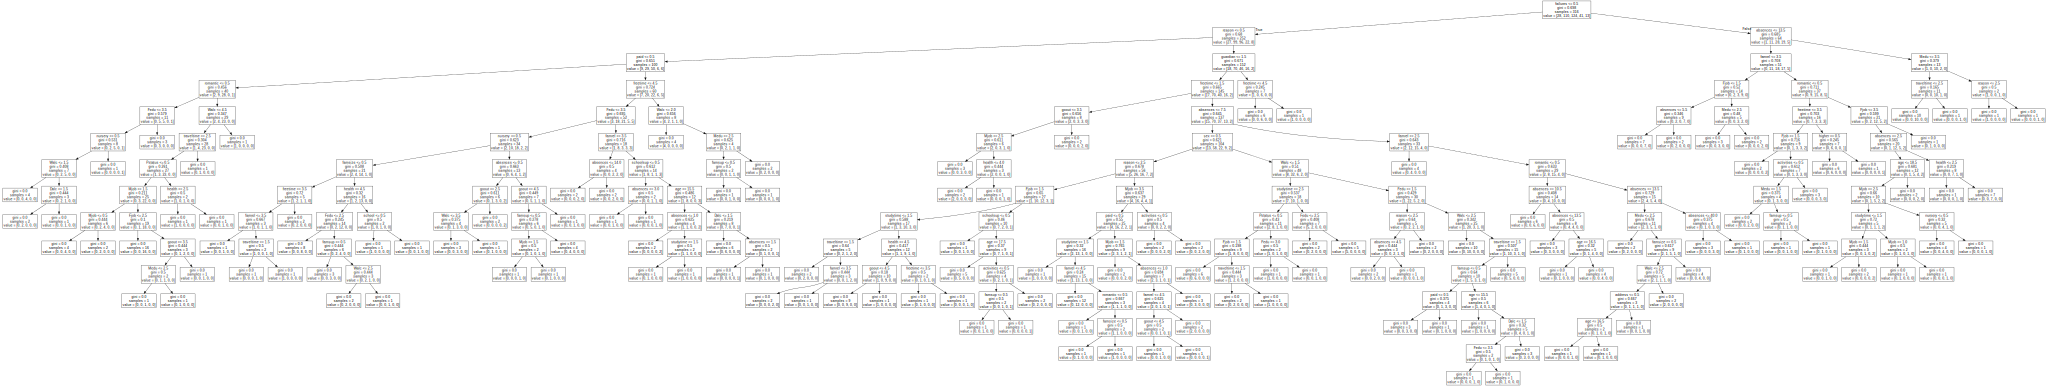

In [122]:
export_graphviz(classifier, 
                out_file = "classifier.dot", 
                feature_names = X_train.columns)

with open("classifier.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [124]:
y_test

146    D
379    C
247    C
197    C
368    C
      ..
41     B
204    C
362    C
233    B
275    B
Name: G2T, Length: 79, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

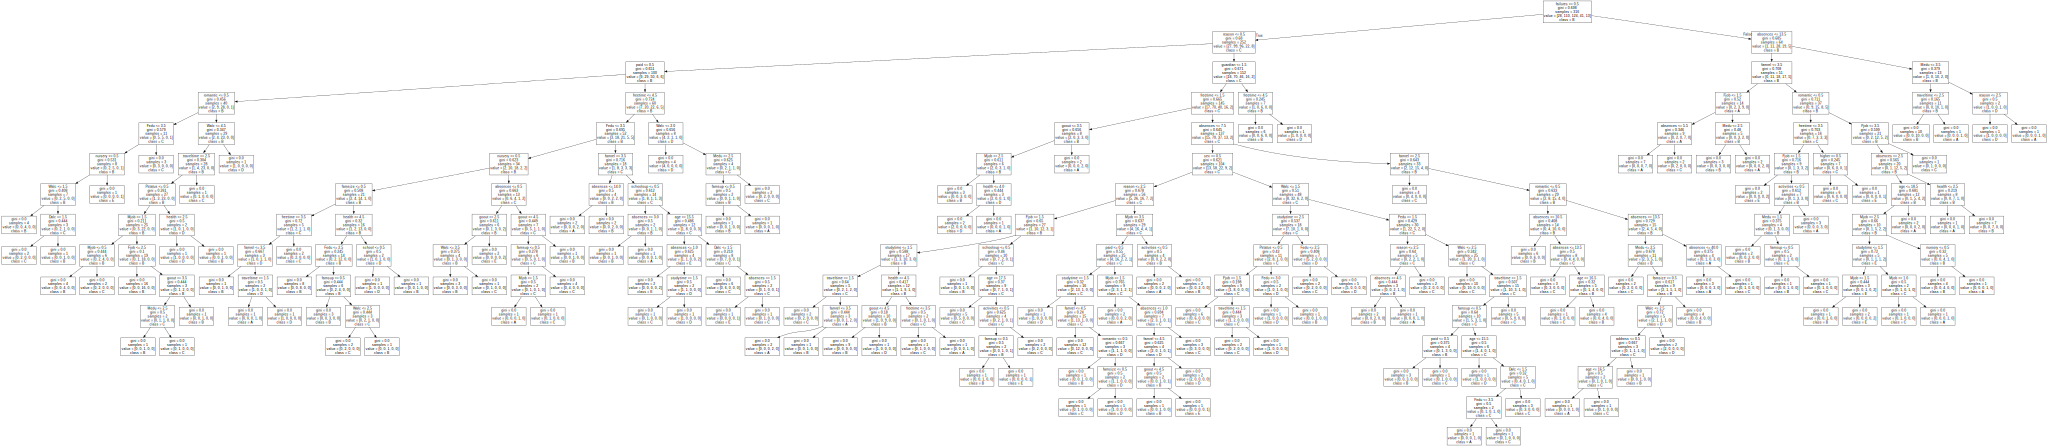

In [125]:
#from sklearn import tree
#import graphviz

# Display the classification tree
#dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=X.columns,
#                                class_names=y.unique().astype(str))  # Convert class names to strings
#graph = graphviz.Source(dot_data)
#graph.render("classification_tree_latest")  # Save the tree as a PDF or image file
#display(graph)  # Display the tree in the notebook

In [126]:
# Print the classification output
classification_output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(classification_output)

    Actual Predicted
146      D         D
379      C         D
247      C         C
197      C         A
368      C         B
..     ...       ...
41       B         C
204      C         A
362      C         B
233      B         C
275      B         C

[79 rows x 2 columns]


In [172]:
# Build a classification tree to classify the G2T variable
classifier = DecisionTreeClassifier(max_depth = 7)  #limiting depth = 7,  due to general guidelines that 70% accuracy is consider generally good enough
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.7310126582278481

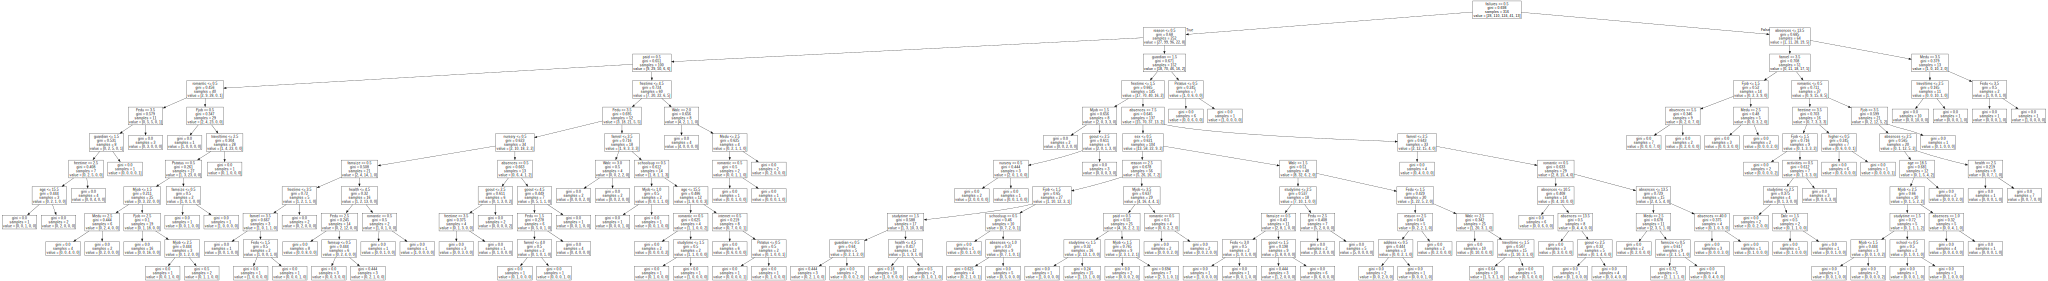

In [152]:
export_graphviz(classifier, 
                out_file = "classifier.dot", 
                feature_names = X_train.columns)

with open("classifier.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

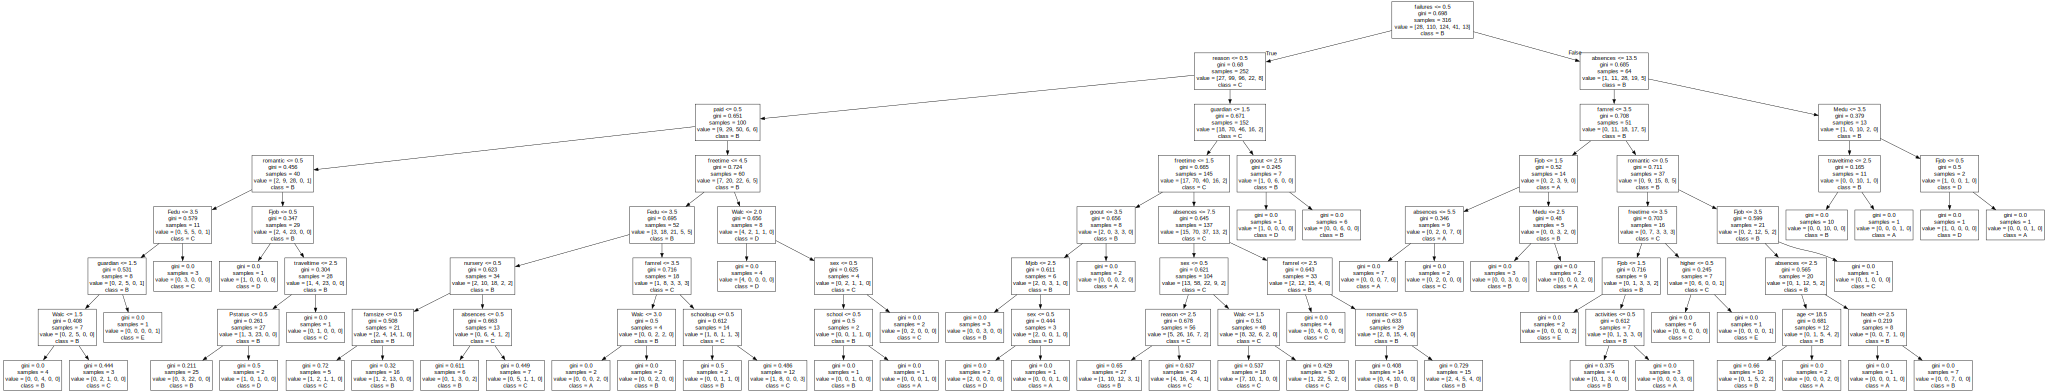

In [145]:
from sklearn import tree
import graphviz

# Display the classification tree
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=X.columns,
                                class_names=y.unique().astype(str))  # Convert class names to strings
graph = graphviz.Source(dot_data)
graph.render("classification_tree_latest_depth7")  # Save the tree as a PDF or image file
display(graph)  # Display the tree in the notebook

In [146]:
y_train.value_counts()

C    124
B    110
D     41
A     28
E     13
Name: G2T, dtype: int64

In [173]:
# to evaluate tree performance on test data
pred = classifier.predict(X_test)
pred
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['A', 'B', 'C', 'D', 'E'], 
                  columns = ['A', 'B', 'C', 'D', 'E'])
print(cm)
# (36+22)/80 = 0.745
# (12+18+2)/79 = 0.41

   A   B   C  D  E
A  0   0   1  1  0
B  2  10  16  0  0
C  3  14  19  7  0
D  0   0   3  1  0
E  0   1   0  1  0


In [150]:
 (12+18+2)/79 

0.4050632911392405

In [169]:
 (11+16+1)/79 

0.35443037974683544

In [154]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets